In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# `sorted` and `Counter`

Protype of sorted 
```md
sorted(iterable, key = lambda item: f(item), reverse = False)
```

In [ ]:
x = [1, 'hello', 2, ' word', 3, ' love', 1, ' hi', 1, ' you']
z = [w for _,w in sorted(zip(x[0::2],x[1::2]))]
print(z)
#[' love', ' word', 'hello', ' you', ' hi']

In [ ]:
tem = {'y': 5, 'x': 0}
min(tem.values())
x = [{'y': 5, 'x': 0}, {'a': 1, 'b': 2}, {'c': 2, 'd': 4}, {'a': 7, 'c': 3}]
sorted(x, key=lambda i: min(i.values()))

In [ ]:
from collections import Counter
s="hello, word, word, love, love, love, hi, you"
slist = s.split(',')
sdict = dict(Counter(slist))
sdict 
result = sorted(sdict.items(), key=lambda x: x[1], reverse=True)
result = [i[0] for i in result]
print(result) 
# [' love', ' word', 'hello', ' hi', ' you']

https://stackoverflow.com/questions/57804057/how-to-print-out-the-values-with-count-in-dictionary-using-counter

In [ ]:
def tuptodi(tup, dictio): 
    for a, b in tup: 
        dictio.setdefault(a, []).append(b) 
    return dictio
tups = [('key1', 'value1'), ('key2', 'value1'),('key3', 'value3'),('key1', 'value1'),('key1', 'value2')]
dictionary = {} 
print (tuptodi(tups, dictionary)) 
{k: dict(Counter(v)) for k, v in res.items()}

In [ ]:
dicl = {'amazon': [668, 667, 879], 'flipkart' : [678], 'hey' : [89,79]}
{k : len(v) for k, v in sorted(dicl.items(), key = lambda i: len(i[1]), reverse=True)}

In [ ]:
data = {'Apple':3, 'Mango':2, 'Orange':2, 'Fig':5, 'Berry':1, 'Cherry':99}
sorted_data = sorted(data.items(), key=lambda kv: kv[1], reverse=True)
print (dict(sorted_data))

 https://stackoverflow.com/questions/53947928/force-items-at-beginning-and-end-of-list/53947953#53947953

In [ ]:
l = ['f','g','p','a','p','c','b','q','z','n','d','t','q']
sorted(l, key = lambda s: (s!='p', s=='q', s))
['p', 'p', 'a', 'b', 'c', 'd', 'f', 'g', 'n', 't', 'z', 'q', 'q']

## sort the part of a dictionary  

https://stackoverflow.com/questions/57644478/how-to-partially-sort-list-of-dictionary-by-dictionary-value-in-python#57644745

In [ ]:
my_list = ['fact9',
 {'filename': 'name2', 'type': 1},
 'fact4',
 {'filename': 'name33', 'type': 4},
 'fact5',
 {'filename': 'name1', 'type': 1},
 'fact6',
 {'filename': 'name12', 'type': 2}]
list(zip(my_list[0::2], my_list[1::2]))

In [ ]:
x = dict(zip(my_list[0::2], my_list[1::2]))
x
# The python popitem dictionary function removes the last inserted key value pair and prints the removed items.
part = {k: v for k, v in x.items() if v['type'] == 1}
part = dict(sorted(part.items(), key=lambda i: i[0]))
anotherPart = {k: v for k, v in x.items() if v['type'] != 1}

In [ ]:
sorted_my_list = [{'fact5': {'filename': 'name1', 'type': 1}},
 {'fact4': {'filename': 'name33', 'type': 4}},
 {'fact9': {'filename': 'name2', 'type': 1}},
 {'fact6': {'filename': 'name12', 'type': 2}}]

sorted_my_list

In [ ]:
res = []       
for _, v in x.items():
    if v['type']==1:
        tem = part.popitem()
        res.append({tem[0]: tem[1]})
    else:
        tem = anotherPart.popitem()
        res.append({tem[0]: tem[1]})
res     

In [ ]:
my_list = [('fact9', {'filename': 'name2', 'type': 1}), ('fact4', {'filename': 'name33', 'type': 4}), ('fact5', {'filename': 'name1', 'type': 1}), ('fact6', {'filename': 'name12', 'type': 2})] 
my_list
tmp_list = sorted([x for x in my_list if x[1]['type']==1], key=lambda x:x[1]['filename'])
tmp_list
sorted_my_list = [x if x[1]['type']!=1 else tmp_list.pop(0) for x in my_list]
sorted_my_list

```md
输入：(9, 2), (3, 7), (7, 8), (3, 5), (1, 9)
输出：(1, 9), (3, 7), (3, 5), (7, 8), (9, 2)
```

In [ ]:
def sort(a):
    alist = [list(i) for i in a]
    alist.sort(key=lambda k: (k[0], -k[1]), reverse=False)
    atuple = tuple(tuple(i) for i in alist)
    return atuple
a = (9, 2), (3, 7), (7, 8), (3, 5), (1, 9)
sort(a)

In [ ]:
d = {"214123" : 75.0,
 "153525" : 60.0,
 "734829" : 40.0,
 "992832" : 89.0,
 "823482" : 80.0}
dict(sorted(list(d.items()), key=lambda p: p[1], reverse=True)[:3])

## Custom Sorting using the key parameter

`sorted()` function has an optional parameter called `key` which takes a function as its value. This key function transforms each element before sorting, it takes the value and returns `1` value which is then used within sort instead of the original value.

In [ ]:
L = ["cccc", "b", "dd", "aaa"]
print("Sort with len :", sorted(L, key=len))

In [ ]:
def last(n):
    return n[m]

a = [(23, 45, 20), (25, 44, 39), (89, 40, 23)]
m = 2
sorted(a, key=last) 

sorted(a, key=lambda x: x[2]) 

## `sorted` based on multiple criteria

https://stackoverflow.com/questions/57832543/how-to-sort-words-in-a-list-by-alphabet-and-word-length-using-python

`sorted` will consider the criteria in order when sorting:

In [ ]:
listOfWords = ['working', 'selling', 'work', 'workers', 'sell', 'world']
print(sorted(listOfWords, key = lambda x: (x, len(x))))
listOfWords

# itertools

In [ ]:
import itertools

## `groupby`

In [ ]:
from itertools import groupby

https://stackoverflow.com/questions/57823718/how-can-i-split-a-dictionary-in-several-dictionaries-based-on-a-part-of-values-u#57823866

In [ ]:
d = {
    'sku1': 'w-1',
    'sku2': 'k-2',
    'sku3': 'b-10',
    'sku4': 'b-1',
    'sku5': 'x-1',
    'sku6': 'x-2'
}

type(d.items())
dir(d.items())

In [ ]:
d = {
    'sku1': 'w-1',
    'sku2': 'k-2',
    'sku3': 'b-10',
    'sku4': 'b-1',
    'sku5': 'x-1',
    'sku6': 'x-2'
}

d.items()

f = lambda x: x[1][0]
t = sorted(d.items(), key=f)
t 
[{i[0]: i[1] for i in list(v)} for k, v in groupby(t, key=f)]

In [ ]:
from collections import defaultdict
d = {
    'sku1': 'w-1',
    'sku2': 'k-2',
    'sku3': 'b-10',
    'sku4': 'b-1',
    'sku5': 'x-1',
    'sku6': 'x-2'
}
mother = defaultdict(dict)
for key, val in d.items():
    mother[val[0]][key] = val

print(dict(mother))

https://stackoverflow.com/questions/57593177/how-to-fix-a-logic-in-python-for-loop

In [ ]:
lists = [
    'a',
    'b',
    'c',
    'None',
    'd',
    'e',
    'e',
    'f',
    'None',
    'g',
    'h',
    'i',
    'i',
    'i',
    'None',
    'aa',
    'aa',
    'aa',
    'aa',
    'aa',
    'ab',
    'ac',
]
index = [i for i, v in enumerate(lists) if v == 'None']
s = 0
i = 0
while i < len(index):
    print((lists[s:index[i]]))
    s = index[i] + 1
    i += 1
print((lists[index[i - 1] + 1:]))

from itertools import groupby
lists = [
    list(group) for key, group in groupby(lists, key=lambda x: x != "None")
    if key
]
#print(lists)

In [ ]:
keys = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
for key, group in groupby(keys, key=lambda x: not x.endswith('#')):
    print(key, list(group)) 
                          
lists = [
    list(group) for key, group in groupby(keys, key=lambda x: not x.endswith('#') )
    if key
]
lists

In [ ]:
from itertools import islice, cycle

In [ ]:
colors = cycle(['red', 'white', 'blue'])  # infinite
type(colors)
next(colors)
limited = islice(colors, 0, 4)            # finite
for x in limited:                         
    print(x)

## `product`

https://stackoverflow.com/questions/57542240/get-all-combination-of-terms#57542240

In [ ]:
from itertools import combinations

In [ ]:
x = combinations([1,2,3],2)
'__iter__' in dir(x) # x is an iterable

In [ ]:
class Solution(object):
    def threeSum(self, nums):
        nums.sort()
        res = []
        for subset in combinations(nums,3):
            if sum(subset) == 0:
                res.append(list(subset))
        return res
nums = [-1, 0, 1, 2, -1, -4]
a = Solution()
a.threeSum(nums)

In [ ]:
x = "new    search words"
words = x.split(' ')
itertools.chain(*(itertools.combinations(words, i) for i in range(1, len(words)+1)))

In [ ]:
from itertools import compress

In [ ]:
def combinations(items):
    return ( set(compress(items,mask)) for mask in product(*[[0,1]]*len(items)) ) 

list(combinations('0123'))

# `random`

In [ ]:
import random 

In [ ]:
suits = ('Hearts', 'Diamonds', 'Spades', 'Clubs')
ranks = ('Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten', 'Jack', 'Queen', 'King', 'Ace')
values = {'Two':2, 'Three':3, 'Four':4, 'Five':5, 'Six':6, 'Seven':7, 'Eight':8, 'Nine':9, 'Ten':10, 'Jack':10,
         'Queen':10, 'King':10, 'Ace':11}
random.sample([i for i in suits], 1)
random.sample([i for i in ranks], 1) 
random.sample([list(j)  for j in values.items()], 1)

In [ ]:
# Why does this code work fine
def okay0():
    def foo():
        L = []
        def bar():
            L.append(5)
        bar()
        return L
    foo()

# and so does this
def okay1():
    def foo():
        def bar():
            L.append(5)
        L = []
        bar()
        return L
    foo()

# but the following code raises an exception?
def broken():
    def foo():
        L = []
        bar()
        return L
    def bar():
        L.append(5)
    foo()

# Example
test_list = [okay0, okay1, broken]
for test_function in test_list:
    try:
        test_function()
    except:
        print("broken")
    else:
        print("okay")

In [ ]:
points = 0 
current = 0 
Q = ['a','b','c']
Q.pop('a')
while(quiz < 5): 
    current = random.randint(0, len(Q) - 1) 
    question = Q[current] 
    answer = A[current]

    question = input("\nQ" + str(quiz + 1) + ". " + Q[current]) 

    if question.lower() == answer.lower(): 
        points = points + 20 
        current = current + 2
        print("Correct Answer!") 

    else:
        pri

In [ ]:
random.sample(list(range(40)),2)
random.sample(list(range(0,40)),2)
a, b = random.sample(list(range(0,40)),2)
a = random.sample([1],1)

In [ ]:
a = 7 if random.choice(list(range(40))) < 20 else 8

In [ ]:
for a in range(1, 9, 100):
    print(a) 

`random.randint(a, b)` <span style="font-family:New York times; font-size:1em; color:green;"> 
Return a random integer N such that a <= N <= b.
</span>

In [ ]:
random.randint(1,100)
random.sample(range(0,20),2)

#  `time`

![](../../figure/xmind/dtime.png)

In [7]:
import calendar

In [8]:
cal = calendar.month(2019, 11)
print(cal)

   November 2019
Mo Tu We Th Fr Sa Su
             1  2  3
 4  5  6  7  8  9 10
11 12 13 14 15 16 17
18 19 20 21 22 23 24
25 26 27 28 29 30



In [9]:
import time

In [10]:
import datetime

In [12]:
time.time()
time.localtime()
time.asctime(time.localtime(time.time()))
time.strptime("12:09:36", "%H:%M:%S")
time.sleep(1)
print('ok')

ok


In [16]:
with open('../../DataAnalysis/data/raw_date_c_commits.txt', 'r') as f:
    data = f.readlines()
    
data = [i.replace('\n', '') for i in data]

In [28]:
datetime.datetime.strptime(data[0], "%Y-%m-%dT%H:%M:%SZ")

datetime.datetime(2019, 12, 20, 15, 6, 9)

In [18]:
%matplotlib inline

In [19]:
import pandas as pd 

In [34]:
data 

['2019-12-20T15:06:09Z',
 '2019-12-18T15:39:48Z',
 '2019-12-16T09:42:41Z',
 '2019-12-10T09:11:48Z',
 '2019-12-10T07:27:07Z',
 '2019-12-06T13:45:22Z',
 '2019-12-01T14:58:37Z',
 '2019-11-27T07:37:51Z',
 '2019-11-24T10:49:04Z',
 '2019-11-24T09:59:17Z',
 '2019-11-19T14:39:22Z',
 '2019-11-17T06:34:09Z',
 '2019-11-16T16:00:09Z',
 '2019-11-13T15:29:24Z',
 '2019-11-11T07:48:11Z',
 '2019-11-08T07:48:26Z',
 '2019-11-06T09:18:58Z',
 '2019-11-05T12:36:37Z',
 '2019-11-04T14:40:24Z',
 '2019-10-31T14:55:25Z',
 '2019-10-30T15:30:33Z',
 '2019-10-29T15:37:57Z',
 '2019-10-28T09:30:57Z',
 '2019-10-27T14:58:05Z',
 '2019-10-26T15:21:43Z',
 '2019-10-25T14:53:56Z',
 '2019-10-18T15:35:17Z',
 '2019-10-12T15:21:39Z',
 '2019-09-29T14:34:50Z',
 '2019-09-26T14:57:24Z',
 '2019-09-24T15:02:32Z',
 '2019-09-23T15:08:26Z',
 '2019-09-22T14:38:49Z',
 '2019-08-25T14:57:24Z',
 '2019-08-03T15:14:16Z',
 '2019-07-10T15:56:07Z',
 '2019-07-09T15:18:01Z',
 '2019-07-06T15:20:41Z',
 '2019-07-05T15:42:26Z',
 '2019-07-02T15:09:37Z',


In [31]:
type(df["date"].dt.hour)

pandas.core.series.Series

In [33]:
dir(df["date"].dt.hour)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

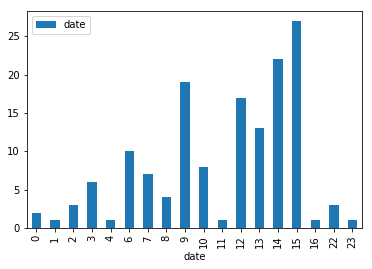

In [22]:
df = pd.DataFrame({'date': data})
df["date"] = df["date"].astype("datetime64")
_ = df.groupby([df["date"].dt.hour]).count().plot(kind="bar")

In [ ]:
#dir(datetime)
type(datetime.date)
isinstance({2}, set)

In [ ]:
#datetime.date
dO = datetime.date.today()
dO
dO.isoformat()
dO.strftime("%m/%d/%Y")
datetime.datetime.strftime(dO, "%m/%d/%Y")
(dO.day, dO.month,dO.year)
dO.isoweekday()
dO.timetuple()
dO.isocalendar()
type(dO)
#dir(dO)

In [ ]:
dTO = datetime.datetime.today()
dTO.date()
dTO.now()
dTO.astimezone()
dTO.isocalendar()
for i in dir(dTO):
    if not i.startswith('_'):
        pass

In [ ]:
today = datetime.date.today().replace(day=1)
min_month = max(today.month - 5, 0)
month_range = range(today.month, min_month, -1)
print([today.replace(month=i).strftime("%B") for i in month_range])

In [ ]:
dt = datetime.datetime.strftime(datetime.datetime.today().date(), "%m/%d/%Y")
dt 

https://stackoverflow.com/questions/57800633/get-last-x-months-in-python

In [ ]:
print(today.month)

month = ["January", "February", "March", "April",
        "May", "June", "July", "August", "September", "October", "November", "December"]

print(sorted( month[today.month:], reverse=True) )

http://strftime.org/

In [ ]:
array = [{'date': '09-Jul-2018'}, 
         {'date': '09-Aug-2018'}, 
         {'date': '09-Sep-2018'}]

to_check = "17-Aug-2018"
to_check = datetime.datetime.strptime(to_check, "%d-%b-%Y")

closest_dates = []
val = 0
for date in array:
    date_val = datetime.datetime.strptime(date["date"], "%d-%b-%Y")
    if date_val <= to_check:
        closest_dates.append({(to_check - date_val).days: date["date"]})
print(min(closest_dates, key=lambda x: list(x.items())[0]))

In [ ]:
array = [{'date': '09-Jul-2018'}, 
         {'date': '09-Aug-2018'}, 
         {'date': '09-Sep-2018'}]

input_dt = datetime.datetime.strptime('17-Aug-2018', '%d-%b-%Y')
sorted(
    map(lambda date: datetime.datetime.strptime(date['date'], '%d-%b-%Y'), array),
    key=lambda dt: (input_dt - dt).total_seconds() if dt < input_dt else float("inf"),
)[0].strftime('%d-%b-%Y')

https://stackoverflow.com/questions/57780935/converting-numeric-dates-into-words-inside-dictionary

In [ ]:
import json

d = {'A1': ['C', '2003-01-01 13:01:00',
            'Lang', '2012-06-02 07:00:00',
            '55901','2001-09-05 00:00:00'],
    'A2': ['Eds', '2002-02-12 10:07:00','12-3-54']}

suf = lambda n: "%d%s"%(n, {1:"st",2:"nd",3:"rd"}.get(n if n < 20 else n % 10, "th"))
daydict = dict(zip(range(1,32), [suf(n) for n in range(1,32)]))
#'January 1st, 2003 at 1:01pm'
for k, v in d.items(): 
    index = 1
    for item in  v[1::2]:
        
        tem = datetime.datetime.strptime(item, '%Y-%m-%d %H:%M:%S')
        x = tem.hour-12 if tem.hour > 12 else tem.hour
        y = 'pm' if tem.hour > 12 else 'am'
        
        d[k][index] = ' '.join([tem.strftime('%B'), daydict[tem.day]+',', str(tem.year), str(x)+':'+tem.strftime('%M')+y])
        index += 2
print(json.dumps(d, indent=2))

# `feedparser`

[feedparser documentation](https://pythonhosted.org/feedparser/common-rss-elements.html)

Parsing a feed from
* a remote URL
* a local file 
* a string

In [ ]:
result =  feedparser.parse('https://complicatedphenomenon.github.io')
cpurl = 'https://complicatedphenomenon.github.io/atom.xml'
result = feedparser.parse(cpurl)
len(result)
massiveoutput = result['entries'][0]['content'][0]['value']

# `configparser` and `logging`

In [ ]:
!find . -name '.ini' #???

In [ ]:
less config-dev.ini

[Configuration file format](https://pymotw.com/2/ConfigParser/)

In [ ]:
import configparser
import logging
CONFIG_PATH = '/Users/wangmiao/Playground/GH/IPython_take_off/basic/WiderKnowledge/config-dev.ini'  # 按照实际情况修改位置
CONFIG = configparser.RawConfigParser()
CONFIG.read(CONFIG_PATH)

LOG_NAME = CONFIG.get('Log', 'Name')
LOG_PATH = CONFIG.get('Log', 'Path')  # 按照实际情况修改位置
LOG_LVL = CONFIG.get('Log', 'Level')
LOG_WHEN = CONFIG.get('Log', 'When')
LOG_INTV = CONFIG.getint('Log', 'Interval')
LOG_MAXC = CONFIG.getint('Log', 'Max Counter')
LOG_FMT = CONFIG.get('Log', 'Format')
MAX_WORKER = int(CONFIG.get('Concurrency', 'Max Workers'))  # 按照实际情况修改数量
PREFETCH_NUM = int(CONFIG.get('Concurrency', 'Consume Number'))  # 按照实际情况修改数量
MQ_HOST = CONFIG.get('Message Queue', 'Host')
MQ_PORT = CONFIG.getint('Message Queue', 'Port')
MQ_VHOST = CONFIG.get('Message Queue', 'Virtual Host')
MQ_USNM = CONFIG.get('Message Queue', 'Username')
MQ_PSWD = CONFIG.get('Message Queue', 'Password')
MQ_DURABLE = CONFIG.getboolean('Message Queue', 'Durable')
MQ_MODE = CONFIG.getint('Message Queue', 'Delivery Mode')
PAPER_REQUEST = CONFIG.get('Message Queue', 'Paper Request Queue')
PAPER_RESPONSE = CONFIG.get('Message Queue', 'Paper Response Queue')
INFO_REQUEST = CONFIG.get('Message Queue', 'Info Request Queue')
INFO_RESPONSE = CONFIG.get('Message Queue', 'Info Response Queue')
DOWNLOAD_PATH = CONFIG.get('Download', 'Path')  
DOWNLOAD_TIME = CONFIG.getint('Download', 'Retry Times')
DOWNLOAD_TMOT = CONFIG.getint('Download', 'Timeout')
TOKEN_URL = CONFIG.get('Upload', 'Token URL')
REDIS_HOST = CONFIG.get('Redis', 'Host')
REDIS_PORT = CONFIG.getint('Redis', 'Port')
REDIS_PSWD = CONFIG.get('Redis', 'Password')
REDIS_DB = CONFIG.getint('Redis', 'Database')
REDIS_TMOT = CONFIG.getint('Redis', 'Timeout')

In [ ]:
REDIS_DB
REDIS_HOST
REDIS_PORT
REDIS_PSWD
REDIS_TMOT

In [ ]:
PAPER_REQUEST
PAPER_RESPONSE
INFO_REQUEST
INFO_RESPONSE

In [ ]:
MQ_HOST
MQ_PORT
MQ_USNM
MQ_PSWD
MQ_DURABLE
MQ_MODE
DOWNLOAD_PATH
DOWNLOAD_TIME
TOKEN_URL

In [ ]:
PAPER_REQUEST

In [ ]:
LOGGER = logging.getLogger()

In [ ]:
logging.basicConfig(format='%(asctime)s - %(message)s', level=logging.INFO)
logging.info('Admin logged in')

In [ ]:
logging.basicConfig(format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
logging.warning('Admin logged out')

In [ ]:
name = 'John'
logging.error('%s raised an error', name)

# Lambda function

<span style="font-family:New York Times; font-size:1.2em; color:green;">
Lambda function
 
尽管Python算不上是一种纯函数式编程语言，但它提供了很多函数式编程的特性，像map, sorted, filter, reduce这些函数都支持函数作为参数。lambda函数可以应用在函数式编程里边。

Map handles the iteration over the sequence for us, applies the function, and stores all of the results in a handy list at the end. 

如果你仔细观察自己的代码，会发现这种场景其实很常见：你在某处就真的只需要一个能做一件事情的函数而已，连它叫什么名字都无关紧要。Lambda 表达式就可以用来做这件事。

In [ ]:
sum = lambda x,y : x+y
sum(1,2)

In [ ]:
startTime= time.time()
l = ['foo', 'bar', 'far']
map(lambda x: x.upper(), l)
list(map(lambda x: x.upper(), l))
a = filter(lambda x: 'f' in x, l)
list(a)
endtime = time.time()
endtime-startTime

In [ ]:
lambdafunc = lambda x: print(x)
map(lambdafunc, [1,2,3])
list(map(lambdafunc, [1,2,3])) 
list(map(lambdafunc, {'USA':'United States America', 'UK':'United Kingdom'})) 

In [ ]:
from functools import reduce 
l = [1, 3, -2, 4]
list(map(lambda x : abs(x), l))
list(filter(lambda x : x < 0, l))

In [ ]:
C = [39.2, 36.5, 37.3, 38, 37.8] 
F = list(map(lambda x: (float(9)/5)*x + 32, C))
C = list(map(lambda x: (float(5)/9)*(x-32), F))

In [ ]:
f = lambda x: x*x
[f(x) for x in range(10)]

In [ ]:
Rank = '34567890JQKA2'
Rank2 = 'DCHS'
def sort_func(words):
    words.sort(key=lambda x: (Rank.index(x[0]), Rank2.index(x[1])))
    return words

print(sort_func(['9C', '9H', '8H', '9D']))

In [ ]:
# Logic is complex and compact
from itertools import groupby                                          
query= [0,0,0,0,0,1,1,1,0,1,0,0,1,1,0]
answer = [[5,8],[9,10],[12,14]]
[(g[0][0], g[-1][0]+1) for g in (list(g) for k, g in groupby(enumerate(query), key=lambda t: t[1]) if k == 1)]  

https://stackoverflow.com/questions/57735924/behavior-of-lists-of-lambda-expression

In [ ]:
f = lambda x, a=2: x+a
f(6,9)

In [ ]:
quxs = [2, 3, 5, 7]
funs = []
for qux in quxs:
    funs.append(lambda x, y, p=qux: x + y * p)
for fun in funs:
    print (fun (1, 4))
# expected: 9, 13, 21, 29
# result: 29, 29, 29, 29

In [ ]:
quxs = [2, 3, 5, 7]
funs = [lambda x, y, q=i: x + y * q for i in quxs]
[fun(1,4) for fun in funs]

# Digit unit 

In [ ]:
int(bin(123)[2:])

In [ ]:
def convertToMilli(n, decimals=0):
    multiplier = 10 ** decimals
    x = int(n *pow(10,6)* multiplier) / multiplier
    print (str(x)+'m(milli)')
convertToMilli(11.2)
convertToMilli(1.625000111, 3)

In [ ]:
def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier
truncate(2, 3) #2.0
truncate(1.625, 2)#1.62

In [ ]:
def digital_root(x:int):
    if type(x)==int:
        x = str(x)
        a = 0
        for i in x:
            a +=int(i) 
        return a
    elif type(x)== str:
        a = 0
        for i in x:
            a +=int(i) 
        return a 
digital_root( "9"*12)        

https://stackoverflow.com/questions/57553683/python-how-to-merge-and-swap-every-nth-element-of-two-lists#57553791

# `pprint`

In [ ]:
from pprint import pprint
pprint([[[] for _ in range(3)] for _ in range(4)], width=30)

https://stackoverflow.com/questions/57600719/split-a-unicode-string-only-at-universal-newlines-n-r-r-n

In [ ]:
my_text = 'Line 1\f\rLine 2\r\nLine 3\f...\nLine 4\n'
print(my_text) 

In [ ]:
spam = [1, 2, 3]
eggs = [10, 20, 30]
print(', '.join(f'{n}:{prct}%' for n, prct in zip(spam, eggs)))

In [ ]:
import io
lines = io.StringIO(my_text, newline='').readlines()
print(lines)
# ['Line 1\x0c\r', 'Line 2\r\n', 'Line 3\x0c...\n', 'Line 4\n']

# magic methods

https://www.tutorialsteacher.com/python/magic-methods-in-python

In [ ]:
n = 5
'__add__' in dir(n)

 When you do `n+10`, the `+` operator calls the `__add__(10)` method. magic methods are not meant to be called directly, but internally, through some other methods or actions. 